# Import Library

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load dataset
df = pd.read_csv('citrus.csv')

In [17]:
# Eksplorasi Data
print('Sample Data:')
print(df.head())
print('\nCek Missing Values:')
print(df.isnull().sum())
print('\nDistribusi Label:')
print(df['name'].value_counts())

Sample Data:
     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9

Cek Missing Values:
name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

Distribusi Label:
name
orange        5000
grapefruit    5000
Name: count, dtype: int64


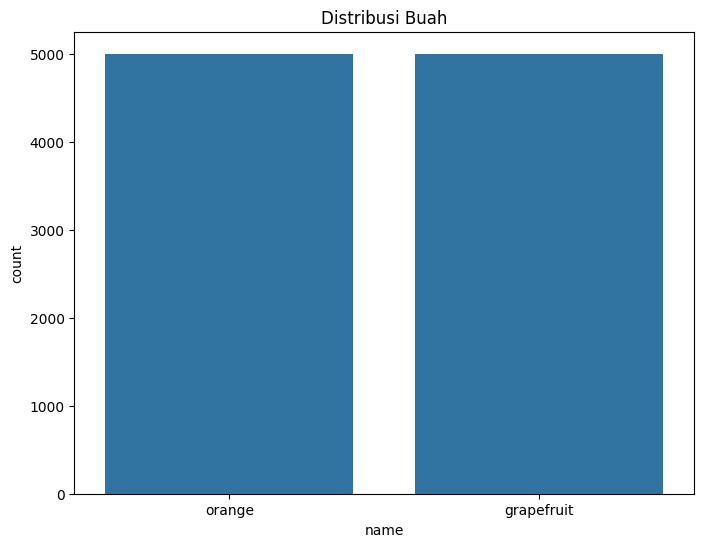

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,6))
sns.countplot(x='name', data=df)
plt.title('Distribusi Buah')
plt.show()

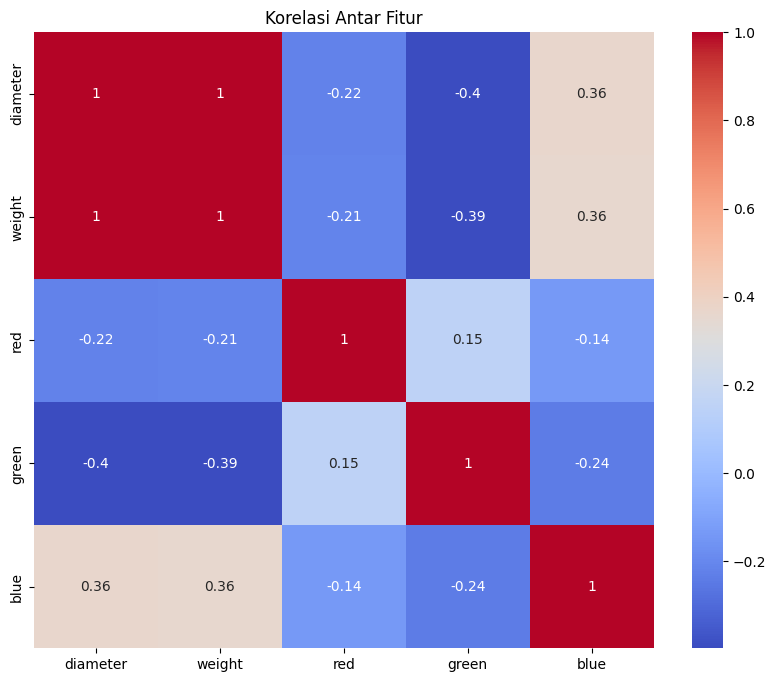

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['diameter', 'weight', 'red', 'green', 'blue']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

In [ ]:
# Mapping label untuk orange dan grapefruit
df['label'] = df['name'].map({'orange': 0, 'grapefruit': 1})
df = df.dropna(subset=['label'])  # hapus jika ada NaN

In [ ]:
# Persiapan Split dataset
X = df[['diameter', 'weight', 'red', 'green', 'blue']]
y = df['label'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Model training
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Prediksi dan evaluasi
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['orange', 'grapefruit']))


Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

      orange       0.93      0.91      0.92      1012
  grapefruit       0.91      0.93      0.92       988

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



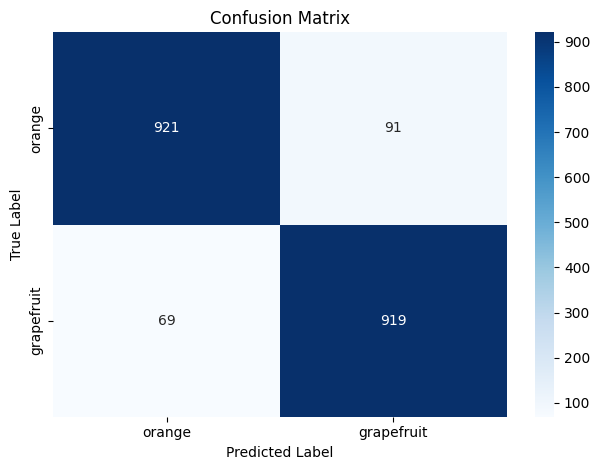

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['orange', 'grapefruit'], yticklabels=['orange', 'grapefruit'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

**Kesimpulan Singkat:**
Model Gaussian Naive Bayes menunjukkan performa klasifikasi yang sangat baik dalam membedakan buah jeruk dan grapefruit, dengan akurasi tinggi di atas 90%. Hal ini terlihat dari distribusi prediksi yang cukup seimbang pada confusion matrix:

- 921 jeruk diprediksi benar, 91 salah sebagai grapefruit

- 919 grapefruit diprediksi benar, 69 salah sebagai jeruk

Model memiliki kesalahan yang relatif kecil dan simetris pada kedua kelas, menunjukkan kemampuan generalisasi yang baik.

Jika ingin meningkatkan performa lebih lanjut, dapat dilakukan eksplorasi terhadap distribusi fitur, uji dengan algoritma lain seperti Random Forest atau SVM, serta menerapkan teknik feature engineering tambahan seperti normalisasi atau seleksi fitur.

